In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer  
import unicodedata
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import os
import glob

In [2]:
raw_data_path = os.path.join('', '')
#all_files = glob.glob(raw_data_path +"/top_songs_with_lyrics.csv")
#lyrics_df = pd.concat(pd.read_csv(f) for f in all_files)
lyrics_df = pd.read_csv('top_songs_with_lyrics.csv')
columnLyric='lyric'

In [3]:
lyrics_df = lyrics_df[lyrics_df[columnLyric].isnull()==False]
lyrics_df = lyrics_df[lyrics_df['clase'].isnull()==False]####


PREPROCESING

In [4]:
!pip3 install es_core_news_md
!python -m spacy download es_core_news_md
#import spacy
#nlp = spacy.load('es_core_news_md')

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [5]:
import re
import string

import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
nltk.download('stopwords')

import es_core_news_md

nlp = es_core_news_md.load()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import spacy
import es_core_news_md

nlp = es_core_news_md.load()
#doc = nlp("ahora todo cambió le toca a ella latino gang  ayer la vi perreando solita  se ve má bonita ahora que no está")
#for token in doc: print(token.text, "|", token.lemma_, '|', token.pos_)

In [7]:
##  Lematizacion  
##  remover acentos 
##  StopWords

def lemmatize(lyric):
    tk = nlp(lyric)
    tk_lemmatize = ""
    for word in tk:
        tk_lemmatize = tk_lemmatize +" "+word.lemma_
    return tk_lemmatize
    

def token_clean_stopwords(message):
    stop_words = stopwords.words('spanish') + stopwords.words('english')
    more_stopwords = ['rhythm','ovy','ay','hey','woh','si', 'pa', 'sé', 'solo', 'yeah', 'yeh', 'oh', 'i', 'to', 'va', 'the', 'aunque', 'you', 'eh', 'cómo','ma']
    total_stopwords = stop_words + more_stopwords

    text_token_stopwords = [word for word in message.split() if ((word.lower() not in total_stopwords) and (len(word)>4))]
    #Para pruebas con Bert
    #total_sentence=""
#    for word in message.split():
#        if ((word.lower() not in total_stopwords) and (len(word)>4)):
#            total_sentence = total_sentence + word.lower()+' ';
    #return total_sentence
    return text_token_stopwords

def remove_puntuation(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join = remove_accents(Test_punc_removed_join)
    return Test_punc_removed_join

def remove_accents(input_str):
    """
    remueve acentos, aunque al ser un texto en inglés no deberían existir acentos
    """
    nfkd_form = unicodedata.normalize('NFKD', input_str )
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

def clean_str_puntuaction(input_df):
    input_df=input_df.replace("'","")
    input_df=input_df.replace("\r"," ")
    input_df=input_df.replace("\n"," ")
    input_df=input_df.replace("-"," ")
    input_df= re.sub("[\(\[].*?[\)\]]", "", input_df)
    input_df= re.sub(r'[^\w\s]', '', input_df)
    input_df= re.sub(r'me ', ' ', input_df)
    input_df= re.sub(r'te ', ' ', input_df)
    #input_df= remove_accents(input_df)
    return input_df

def clean_lyric(input_lyric):
    input_lyric =input_lyric.lower()
    input_lyric = clean_str_puntuaction(input_lyric)
    #input_lyric = remove_puntuation(input_lyric)
    input_lyric = lemmatize(input_lyric)
    input_lyric = remove_accents(input_lyric)
    input_lyric = lemmatize(input_lyric)
    
    input_lyric = token_clean_stopwords(input_lyric)

    return input_lyric

# Vectorizar texto sin preprocesar

In [8]:
# Texto sin preprocesar
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = clean_lyric)
lyrics_countvectorizer = vectorizer.fit_transform(lyrics_df['lyric'])

In [9]:
print(vectorizer.get_feature_names())

['ADORADA', 'ASTROS', 'Aaron', 'Abajo', 'Abonero', 'Abrazada', 'Abrazado', 'Abrazame', 'Abrazando', 'Abrazarte', 'Abrazo', 'Abrirte', 'Absolutamente', 'Aburrida', 'Abusa', 'Abusador', 'Abusaste', 'Acapulco', 'Acariciale', 'Acaso', 'Acentuando', 'Aceptalo', 'Aceptandome', 'Acepto', 'Acercate', 'Aclaremos', 'Acomodese', 'Acompaname', 'Aconseja', 'Aconsejale', 'Acortame', 'Acostumbrado', 'Acostumbrandome', 'Acudire', 'Acuerdense', 'Acumele', 'Acurrucarte', 'Ademas', 'Adentro', 'Adictiva', 'Adidas', 'Adios', 'Admirarte', 'Admitelo', 'Admito', 'Adonde', 'Adorar', 'Adorarte', 'Adorne', 'Adriel', 'Afloja', 'Afortunada', 'Afortunado', 'Africa', 'Africano', 'Africanos', 'Afronto', 'Agarra', 'Agarrar', 'Agarre', 'Agarro', 'Agonizando', 'Agradezco', 'Aguantate', 'Aguardientes', 'Aguas', 'Agugu', 'Ahogando', 'Ahora', 'Ahorita', 'Alardeando', 'Alcance', 'Alcohol', 'Alegras', 'Alegres', 'Alejate', 'Aleks', 'Aleluya', 'Alfredo', 'Alguien', 'Algun', 'Alrededor', 'Alvarez', 'Amando', 'Amanece', 'Amanec

In [10]:
print(lyrics_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Ejecutar desde aquí 

In [11]:

lyrics = pd.DataFrame(lyrics_countvectorizer.toarray())

lyrics.reset_index(drop=True, inplace=True)


In [12]:
X = lyrics
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6991,6992,6993,6994,6995,6996,6997,6998,6999,7000,7001,7002,7003,7004,7005,7006,7007,7008,7009,7010,7011,7012,7013,7014,7015,7016,7017,7018,7019,7020,7021,7022,7023,7024,7025,7026,7027,7028,7029,7030
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,23,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
854,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
855,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
856,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
X.shape


(858, 7031)

In [14]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6991,6992,6993,6994,6995,6996,6997,6998,6999,7000,7001,7002,7003,7004,7005,7006,7007,7008,7009,7010,7011,7012,7013,7014,7015,7016,7017,7018,7019,7020,7021,7022,7023,7024,7025,7026,7027,7028,7029,7030
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,23,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [15]:

y=lyrics_df['clase']


In [16]:
y.shape

(858,)

In [17]:
#Dividir el dataset en Entrenamiento y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
#se divide el 80 del set para validación y que quede 60,20,20
X_train1, X_valid, y_train1, y_valid = train_test_split(X_train, y_train, test_size=0.25) 

#train= train1 + valid


# Funcion mostrar resultados

In [18]:
#definimos funciona para mostrar los resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(10, 10))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu");
    plt.title("Matriz de Confusión")
    plt.ylabel('Clase Verdadera')
    plt.xlabel('Clase Predicha')
    plt.show()
    print (classification_report(y_test, pred_y))

# Probar distintos Algoritmos

# Naive Bayes

In [19]:
from sklearn import datasets, metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB(alpha=3.0, class_prior=None, fit_prior=False)
NB_classifier.fit(X_train, y_train)
score = NB_classifier.score(X_train, y_train)
print("Metrica del modelo", score)
skf = StratifiedKFold(n_splits=3)
scores = cross_val_score(NB_classifier, X_train, y_train, cv=skf, scoring="accuracy")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

Metrica del modelo 0.8877551020408163
Metricas cross_validation [0.6768559  0.65502183 0.65350877]
Media de cross_validation 0.6617955003958221


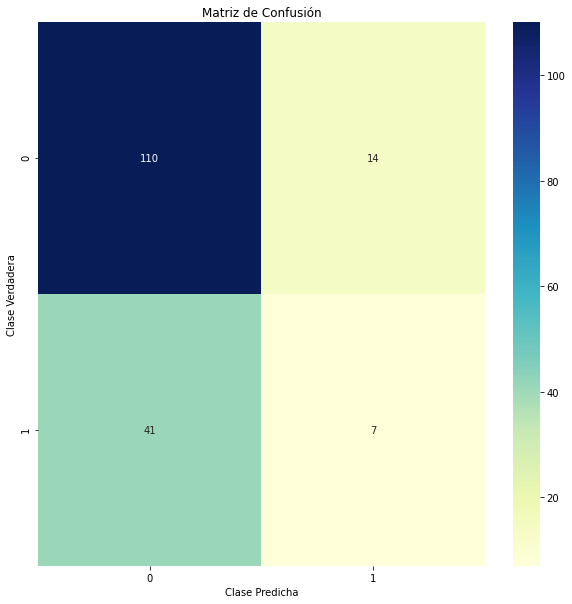

              precision    recall  f1-score   support

         0.0       0.73      0.89      0.80       124
         1.0       0.33      0.15      0.20        48

    accuracy                           0.68       172
   macro avg       0.53      0.52      0.50       172
weighted avg       0.62      0.68      0.63       172



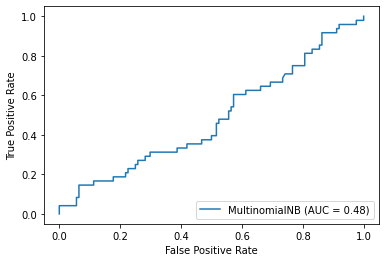

In [35]:
# Cambiar nombre del clasificador
y_predict_test = NB_classifier.predict(X_test)
mostrar_resultados(y_test, y_predict_test)
metrics.plot_roc_curve( NB_classifier , X_test , y_test)  # doctest: +SKIP
plt.show()


# Random Forest

In [21]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV###
from sklearn.model_selection import StratifiedKFold###

grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [35,40, 45],
               'max_features': ['auto'],
               'min_samples_leaf': [4, 3, 2],
               'min_samples_split': [20, 25, 10],
               'n_estimators': [200, 300, 400, 450 ],
               'random_state':[None]}

clf = RandomForestClassifier()
skf = StratifiedKFold(n_splits=3)
rndmf = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = skf, verbose= 5, n_jobs = -1)
rndmf.fit(X_train ,y_train)###de acuerdo al diagrama se usará valid y train para elegir el mejor modelo 

predictionforest = rndmf.best_estimator_.predict(X_valid)#se usará para competir 
print(confusion_matrix(y_valid,predictionforest))
print(classification_report(y_valid,predictionforest))

#______________________________________________________

#rndmf = RandomForestClassifier(max_depth= 20, random_state= 0)
#rndmf= rndmf.fit(X_train, y_train)
#tree.plot_tree(rndmf.best_estimator_, filled = True)
#plt.show()

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed: 16.6min finished


[[114   0]
 [ 37  21]]
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86       114
         1.0       1.00      0.36      0.53        58

    accuracy                           0.78       172
   macro avg       0.88      0.68      0.70       172
weighted avg       0.84      0.78      0.75       172



In [22]:
score = rndmf.best_estimator_.score(X_test, y_test)####estaba: rndmf.score(X_train, y_train)
print("Metrica del modelo", score)
scores = cross_val_score(rndmf.best_estimator_, X_test, y_test, cv=skf, scoring="accuracy") 
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

Metrica del modelo 0.7151162790697675
Metricas cross_validation [0.72413793 0.71929825 0.71929825]
Media de cross_validation 0.7209114740875177


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=35, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


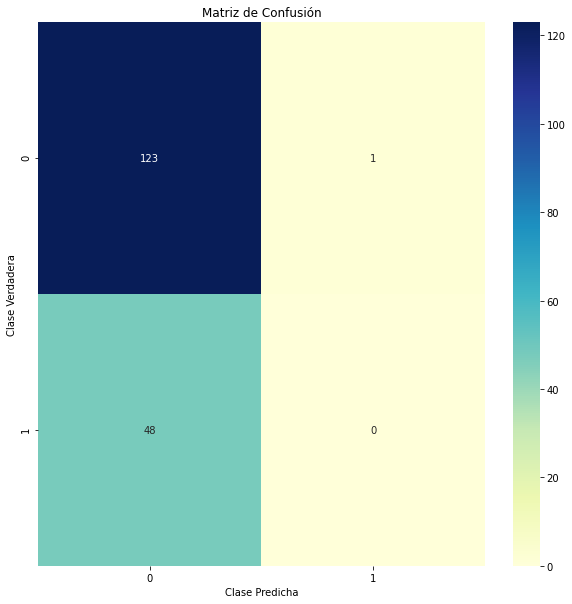

              precision    recall  f1-score   support

         0.0       0.72      0.99      0.83       124
         1.0       0.00      0.00      0.00        48

    accuracy                           0.72       172
   macro avg       0.36      0.50      0.42       172
weighted avg       0.52      0.72      0.60       172



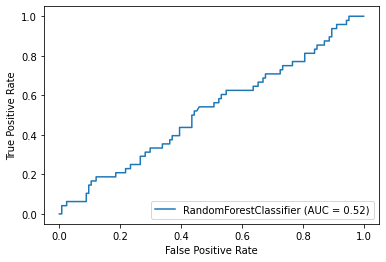

In [36]:
#presentamos resulados y mejores parámetros 
print(rndmf.best_estimator_)
bestrndmf= rndmf.best_estimator_.fit(X_train ,y_train)
y_predict_test = bestrndmf.predict(X_test)
mostrar_resultados(y_test, y_predict_test)

metrics.plot_roc_curve( rndmf.best_estimator_ , X_test , y_test)

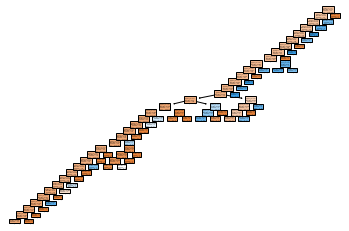

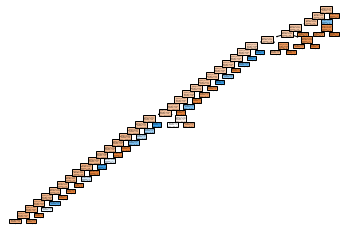

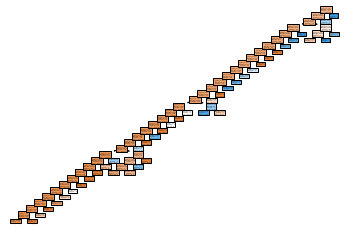

In [24]:
tree.plot_tree(rndmf.best_estimator_[28], filled = True)
plt.show()

tree.plot_tree(rndmf.best_estimator_[20], filled = True)
plt.show()

tree.plot_tree(rndmf.best_estimator_[10], filled = True)
plt.show()

# Decision Tree 

In [25]:
# Poner algoritmo aqui
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = tree.DecisionTreeClassifier(criterion='gini',
                                   #min_samples_split=20,
                                   min_samples_leaf=5,
                                   max_depth = 30,
                                   class_weight={1:4})
tree = tree.fit(X_train, y_train)

#tree.plot_tree(arbol, filled= True)
#plt.show()
score = tree.score(X_train, y_train)
print("Metrica del modelo", score)
skf = StratifiedKFold(n_splits=3)
scores = cross_val_score(tree, X_train, y_train, cv=skf, scoring="accuracy")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

Metrica del modelo 0.7682215743440233
Metricas cross_validation [0.49781659 0.53275109 0.53070175]
Media de cross_validation 0.5204231466584949


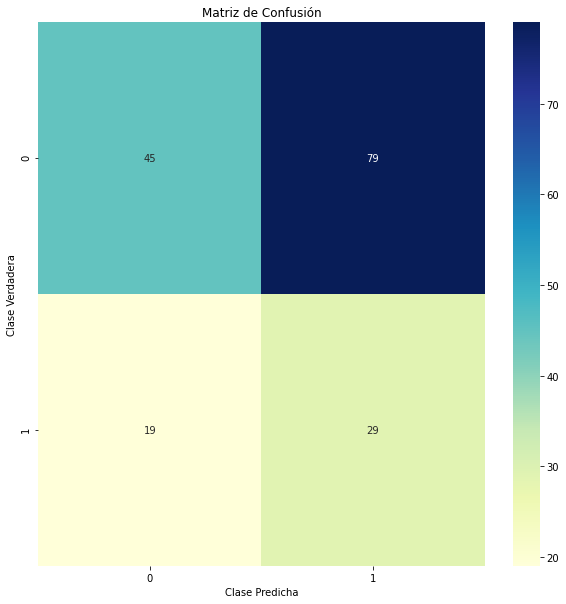

              precision    recall  f1-score   support

         0.0       0.70      0.36      0.48       124
         1.0       0.27      0.60      0.37        48

    accuracy                           0.43       172
   macro avg       0.49      0.48      0.43       172
weighted avg       0.58      0.43      0.45       172



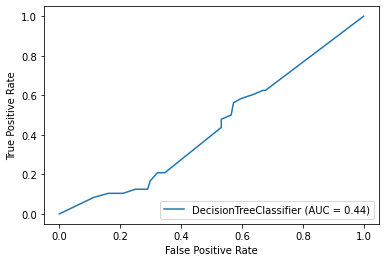

In [37]:
y_predict_test = tree.predict(X_test)
mostrar_resultados(y_test, y_predict_test)
metrics.plot_roc_curve( tree , X_test , y_test)

## SVM

In [27]:
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)

score = clf_svm.score(X_train, y_train)
print("Metrica del modelo", score)
skf = StratifiedKFold(n_splits=3)
scores = cross_val_score(clf_svm, X_train, y_train, cv=skf, scoring="accuracy")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

Metrica del modelo 0.8425655976676385
Metricas cross_validation [0.67248908 0.68122271 0.67982456]
Media de cross_validation 0.6778454505988406


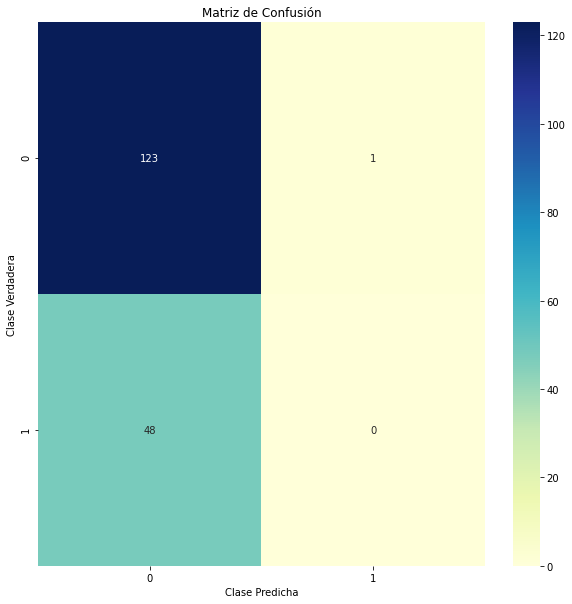

              precision    recall  f1-score   support

         0.0       0.72      0.99      0.83       124
         1.0       0.00      0.00      0.00        48

    accuracy                           0.72       172
   macro avg       0.36      0.50      0.42       172
weighted avg       0.52      0.72      0.60       172



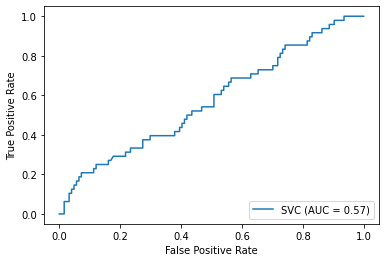

In [38]:
y_predict_test = clf_svm.predict(X_test)
mostrar_resultados(y_test, y_predict_test)
metrics.plot_roc_curve( clf_svm , X_test , y_test)

## SGD Classifier

In [30]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV###
from sklearn.model_selection import StratifiedKFold###

grid_search = {'loss' :['hinge'], 
               'penalty':['l2'],
               'alpha':[0.0001, 0.1], 
               'l1_ratio' : [0.15, .1], 
               'fit_intercept' : [True], 
               'max_iter': [1000], 
               'tol': [0.001], 
               'shuffle':[True], 
               'verbose':[0], 
               #'epsilon': [DEFAULT_EPSILON], 
               'n_jobs':[None], 
               'random_state':[None], 
               'learning_rate':['optimal'], 
               'eta0':[0.0], 
               'power_t':[0.5], 
               'early_stopping':[False], 
               'validation_fraction':[0.1], 
               'n_iter_no_change':[5], 
               'class_weight':[None], 
               'warm_start':[False], 
               'average':[False]
               }

clf_sgd = SGDClassifier()
#clf_sgd.fit(X_train, y_train)
skf = StratifiedKFold(n_splits=3)
sgdc = GridSearchCV(estimator = clf_sgd, 
                    param_grid = grid_search,
                    cv = skf)
                    #verbose=0,
                    #n_jobs = -1)
sgdc.fit(X_train ,y_train)###de acuerdo al diagrama se usará valid y train para elegir el mejor modelo 

predictionsgdc = sgdc.best_estimator_.predict(X_valid)#se usará para competir 
print(confusion_matrix(y_valid,predictionsgdc))
print(classification_report(y_valid,predictionsgdc))



score = sgdc.best_estimator_.score(X_train, y_train)
print("Metrica del modelo", score)
skf = StratifiedKFold(n_splits=3)
scores = cross_val_score(sgdc.best_estimator_, X_train, y=y_train, cv=skf, scoring="accuracy")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())




[[114   0]
 [  9  49]]
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       114
         1.0       1.00      0.84      0.92        58

    accuracy                           0.95       172
   macro avg       0.96      0.92      0.94       172
weighted avg       0.95      0.95      0.95       172

Metrica del modelo 0.9446064139941691
Metricas cross_validation [0.61135371 0.64628821 0.67982456]
Media de cross_validation 0.6458221609336295


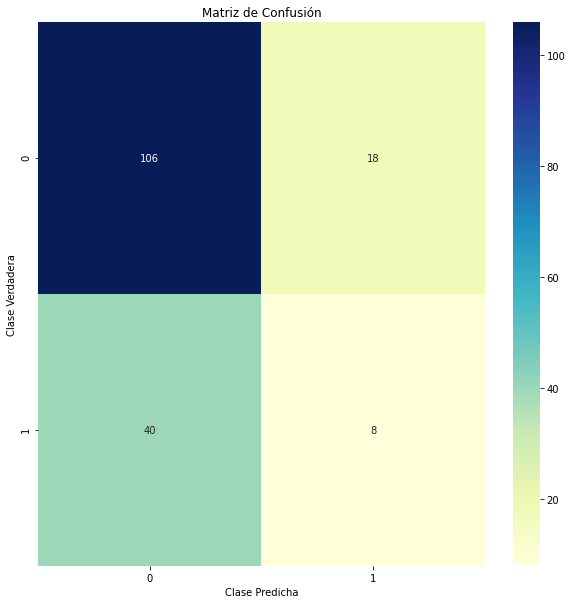

              precision    recall  f1-score   support

         0.0       0.73      0.85      0.79       124
         1.0       0.31      0.17      0.22        48

    accuracy                           0.66       172
   macro avg       0.52      0.51      0.50       172
weighted avg       0.61      0.66      0.63       172



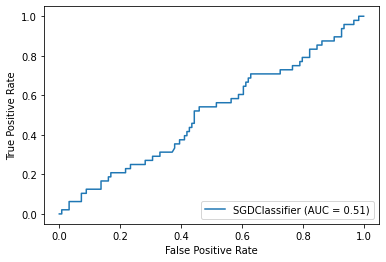

In [44]:
y_predict_test = sgdc.best_estimator_.predict(X_test)
mostrar_resultados(y_test, y_predict_test)

metrics.plot_roc_curve(sgdc.best_estimator_ , X_test , y_test)

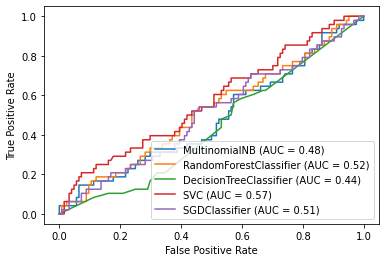

In [70]:
NBDISP=metrics.plot_roc_curve( NB_classifier , X_test , y_test)  
RFDISP=metrics.plot_roc_curve( rndmf.best_estimator_ , X_test , y_test, ax= NBDISP.ax_)  
TREEDISP=metrics.plot_roc_curve( tree , X_test , y_test, ax= RFDISP.ax_)  
SVMDISP=metrics.plot_roc_curve( clf_svm , X_test , y_test, ax= TREEDISP.ax_)  
SGDISP=metrics.plot_roc_curve( sgdc.best_estimator_ , X_test , y_test, ax= SVMDISP.ax_)  
                         
plt.show()
